In [8]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import sys

In [20]:
def eucledian_distance(x, y):
    return ((x - y) ** 2).sum()

def get_k_random_points(data, features, K):
    points = np.zeros([K, features])
    for i in range(features):
        _ = np.random.randint(low=data[:, i].min(), high=data[:, i].max(), size=K)
        points[:, i] = _
    
    return points

def update_means(means, data, index, counters):
    means[index] = ((means[index] * (counters[index] - 1)) + data)/counters[index]
    
def form_clusters(data, means, K):
    labels = []
    counters = np.ones( [K] ,dtype=np.int32)
    for i in data:
        distance, index = sys.maxsize, sys.maxsize
        for j in range(len(means)):
            dis = eucledian_distance(i, means[j])
            if(dis < distance):
                distance = dis
                index = j
        labels.append(index)
        counters[index] = counters[index] + 1
        update_means(means, i, index, counters)
        #print(means)
    
    return labels

def predict(data, means, K):
    return form_clusters(data, means, K)

In [31]:
data = [
    [1,8],
    [2,2],
    [2,9],
    [1,2],
    [2,4],
    [1, 10],
    [2,8],
    [4,2],
    [6,9],
    [8,2],
    [10,3.5],
    [7, 10]
]

data = np.array(data)

#number of clusters K
K = 3
features = data.shape[1]


means = get_k_random_points(data, features, K)

for i in range(100):
    output = form_clusters(data, means, K)

print("Means >>>\n",means)
print("\nOutput >>>",output)

Means >>>
 [[1.5        8.75      ]
 [3.4        2.4       ]
 [7.66666667 7.5       ]]

Output >>> [0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2]


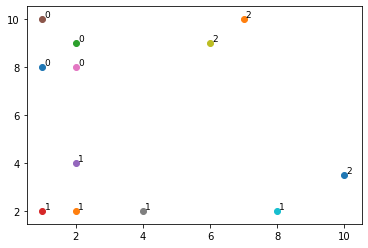

In [32]:
for i in range(len(data)):
        plt.scatter(data[i][0], data[i][1])
        plt.text(data[i][0] + 0.07, data[i][1] + 0.07, str(output[i]), fontsize=9)

In [30]:
test_data = [
    [2,9],
    [1,2],
    [2,4],
     [6,9],
    [8,2],
    [10,3.5]
]
print("Output >> ", predict(test_data, means, K))

Output >>  [2, 0, 0, 1, 0, 0]
